<a href="https://colab.research.google.com/github/nagapurisatwika/Task.2-EDA-Using-Weather-dataset-/blob/main/Task_2(EDA)using_weather_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64

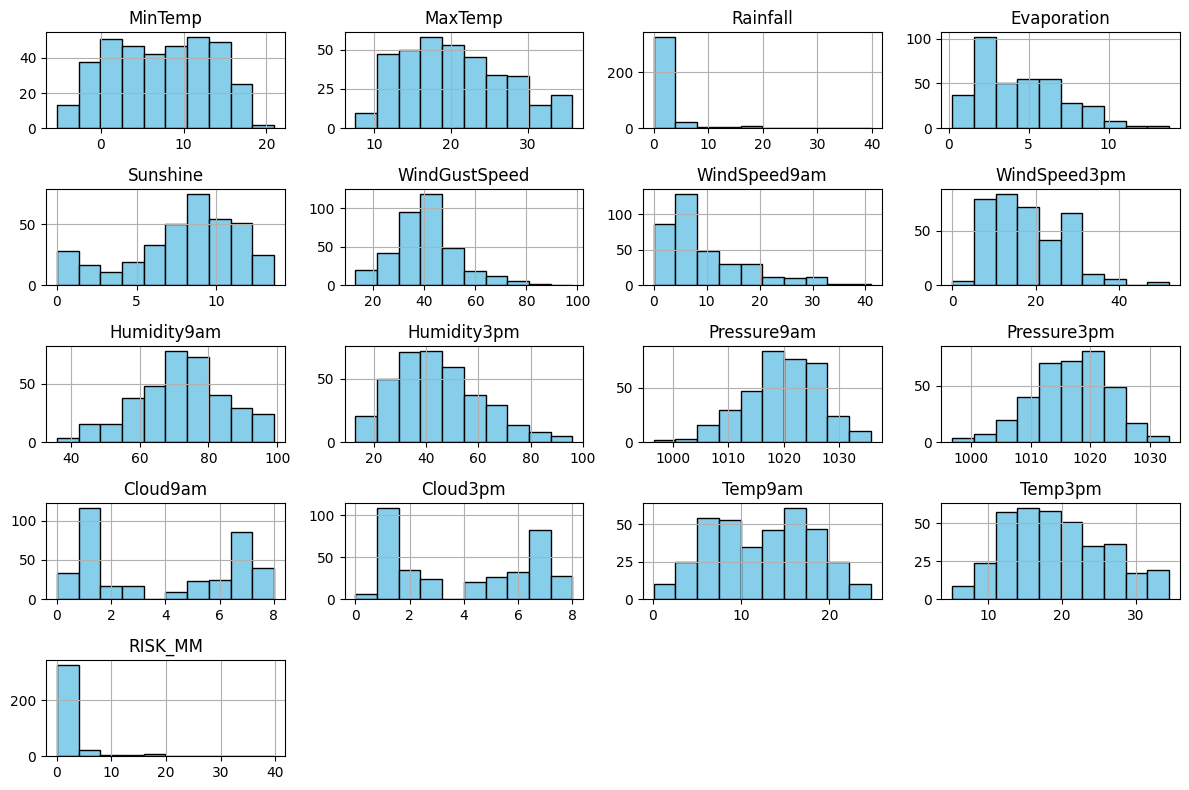


🔹 Boxplots:


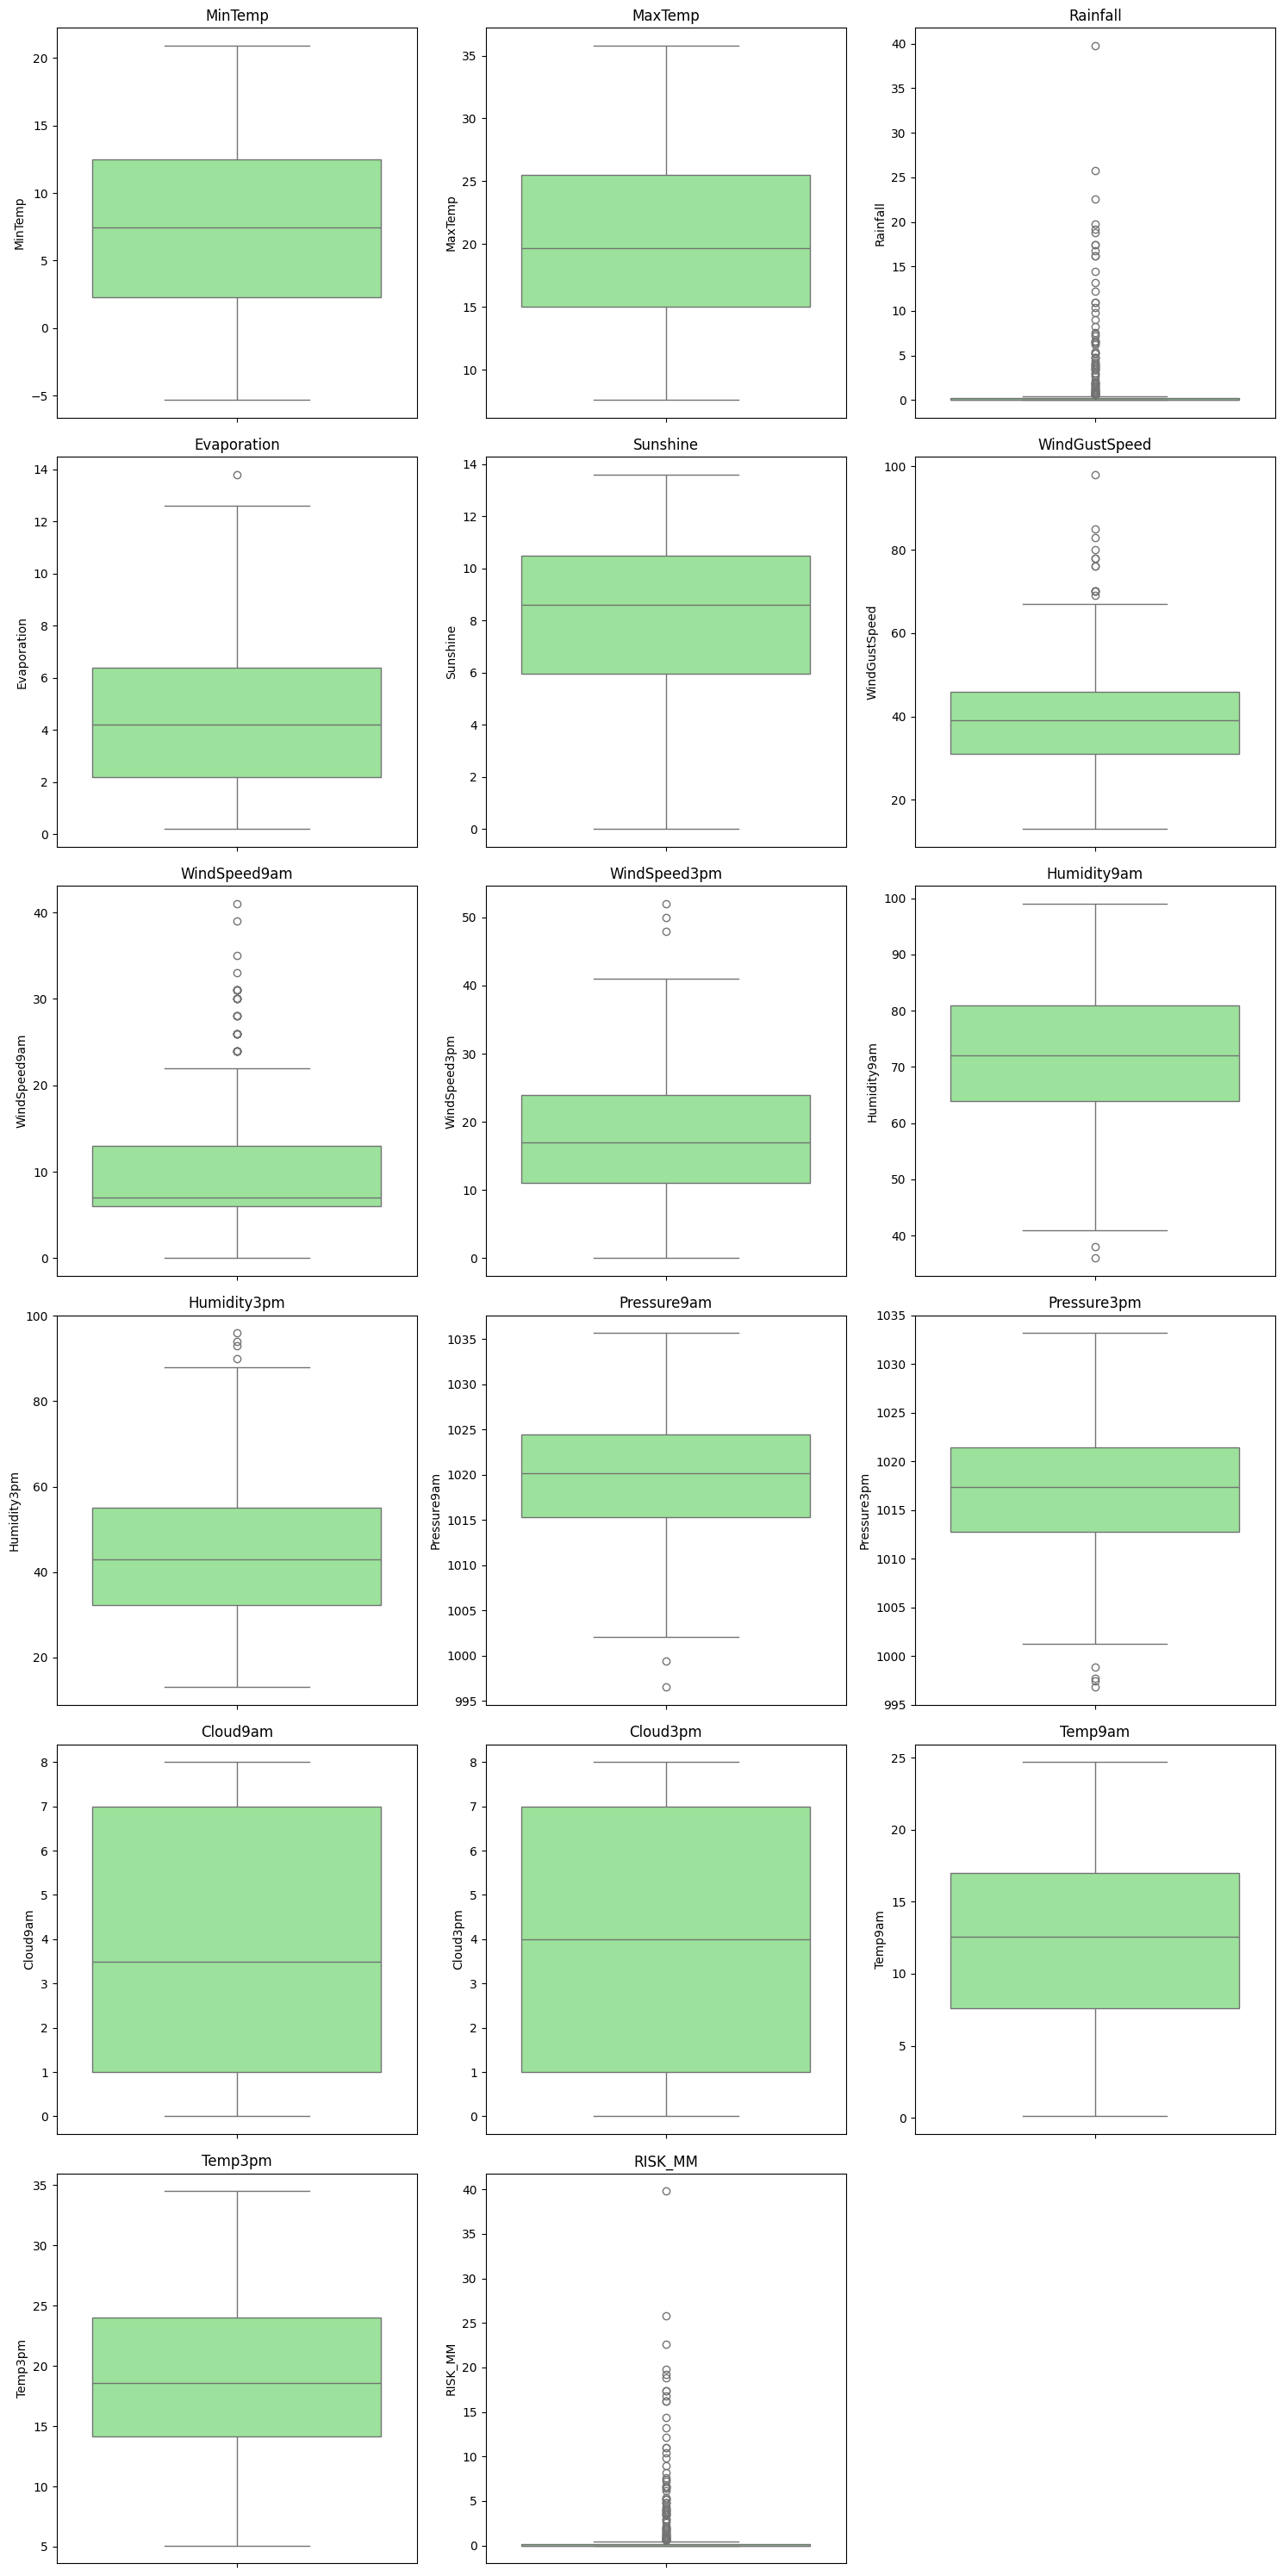


🔹 Correlation Heatmap:


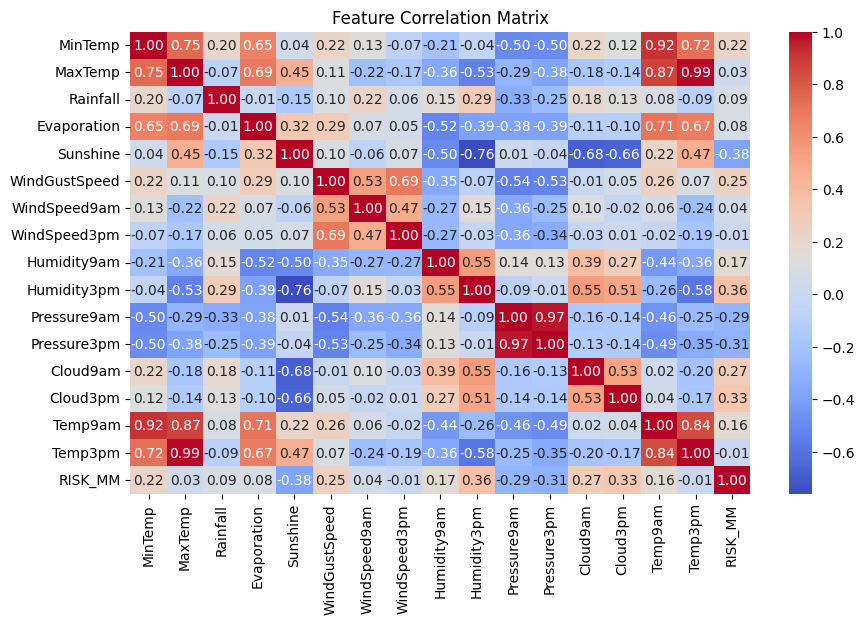


🔹 Pairplot of Top Numeric Features:


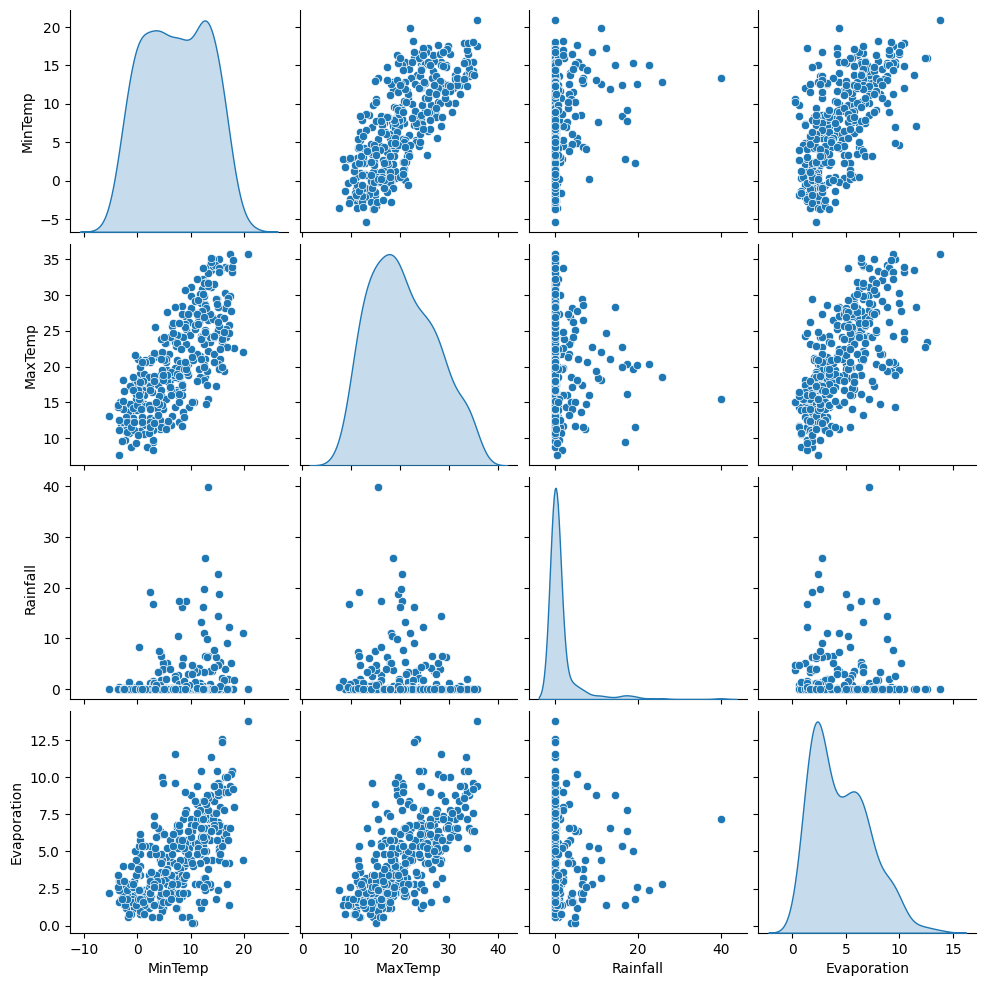


🔹 Inference Ideas:
• Check if higher temperatures correlate with lower humidity.
• Look for outliers in temperature or rainfall.
• Identify any patterns across weather types.


In [15]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math

# 1. Load the dataset
df = pd.read_csv('weather.csv')

# 2. Basic Data Info
print("🔹 Dataset Info:")
print(df.info())

print("\n🔹 First 5 rows of data:")
print(df.head())

# 3. Summary Statistics
print("\n🔹 Summary Statistics:")
print(df.describe())

# 4. Check for missing values
print("\n🔹 Missing Values:")
print(df.isnull().sum())

# 5. Histogram for Numeric Columns
print("\n🔹 Histogram of Numeric Features")
df.hist(figsize=(12, 8), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

# 6. Boxplot to Identify Outliers (Fixed version)
print("\n🔹 Boxplots:")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

n_cols = 3  # columns per row
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(col)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 7. Correlation Heatmap
print("\n🔹 Correlation Heatmap:")
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# 8. Pairplot to See Relationships
print("\n🔹 Pairplot of Top Numeric Features:")
top_cols = numeric_cols[:4]  # Select top 4 numeric columns
sns.pairplot(df[top_cols], diag_kind='kde')
plt.show()

# 9. Plotly Interactive Visual - Temperature vs Humidity (example)
if 'Temperature' in df.columns and 'Humidity' in df.columns:
    print("\n🔹 Interactive Scatter Plot (Temperature vs Humidity):")
    fig = px.scatter(df, x='Temperature', y='Humidity', color='Weather', title="Temperature vs Humidity")
    fig.show()

# 10. Inference Section
print("\n🔹 Inference Ideas:")
print("• Check if higher temperatures correlate with lower humidity.")
print("• Look for outliers in temperature or rainfall.")
print("• Identify any patterns across weather types.")
